# Mount Drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/My Drive/GitHub/resnet_recreate"
%ls

/content/gdrive/My Drive/GitHub/resnet_recreate
archive/  load_data.ipynb  main.ipynb  models.ipynb  __pycache__/  README.md


# Modules

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# # <===   Custom modules ===>
# #for colab---
# !pip install import_ipynb
# import import_ipynb 
# #for jupyter---
# from importnb import Notebook #for jupyter
# #for reload ---
# import importlib
# import sys

### Module Info

In [19]:
print(tf.__version__)
print(tf.test.is_gpu_available())

2.2.0
False


### Import custom modules

In [ ]:
# go to module folder location
%cd "/content/gdrive/My Drive/GitHub/resnet_recreate"
%ls

/content/gdrive/My Drive/GitHub/resnet_recreate
archive/  load_data.ipynb  main.ipynb  __pycache__/  README.md


####For colab

Install and Import first run

In [4]:
!pip install import_ipynb
import import_ipynb
import sys
import importlib

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=d1b56e8dcbca0ee3152f39bd9b607e5072ad2ee037b71decd971f582f25e60aa
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [5]:
import load_data

importing Jupyter notebook from load_data.ipynb


##### Reload for colab

In [ ]:
importlib.reload(sys.modules["load_data"])
import load_data

importing Jupyter notebook from load_data.ipynb


In [ ]:
importlib.reload(sys.modules["models"])
from models import Resnet18

importing Jupyter notebook from models.ipynb


Custom reload (in progress)

In [ ]:
custom_import_list = ["load_data",
                      "models"]

for name in custom_import_list:
  importlib.reload(sys.modules[name])

####For jupyter

Install and Import first run

In [ ]:
from importnb import Notebook
with Notebook():
        import load_data

#####Reload from jupyter

In [ ]:
import importlib

In [ ]:
with Notebook(): 
    importlib.reload(load_data)

#### Import, Run and Explore

In [ ]:
load_data.test(5)

5 * 10 = 50. Yes it works


In [ ]:
dir(load_data)

['__builtins__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'drive',
 'get_ipython',
 'load_tfds',
 'np',
 'plt',
 'test',
 'tf',
 'tfds']

In [ ]:
help(load_data)

Help on module load_data:

NAME
    load_data

DESCRIPTION
    Load tf dataset
    Preprocess tfds image data

FUNCTIONS
    load_tfds(name, location)
        Load Tensorflow Dataset to Virtual from tfds web
        
        Args(2):
          name: str, e.g. "cifar10"
          location : str , "web", "local", "gdrive",
            or data_dir, e.g. local: r"C:/Users/pdhar", gdrive: "/content/gdrive/My Drive"
        Output(2):
          dataset: tfds dataset
          info: tfds.core.DatasetInfo
    
    test(num)

DATA
    __test__ = {'string-43': '# Modules\n', 'string-72': '# Load tfds data...

FILE
    c:\users\pdhar\google drive\github\resnet_recreate\load_data.ipynb




# Load Dataset

In [7]:
#@title String fields

name = 'cifar10' #@param ["cifar10", "2nd option", "3rd option"] {allow-input: true}
location = 'web' #@param ["web", "gdrive", "local"]
print(name)
print(location)

cifar10
web


In [8]:
dataset, info = load_data.load_tfds(name, location)
info

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incomplete8VT7VI/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incomplete8VT7VI/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.0,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

# Preprocess

In [9]:
INPUT_SHAPE = info.features["image"].shape
BATCH_SIZE = 32

num_classes = info.features["label"].num_classes
class_names = info.features["label"].names
num_train = info.splits["train"].num_examples
num_test = info.splits["train"].num_examples

In [10]:
train, test = load_data.preprocess(dataset, BATCH_SIZE)

batch, height, width, channel: (32, 32, 32, 3)
batch label: (32,)
data type: <dtype: 'float32'>


# Visualise

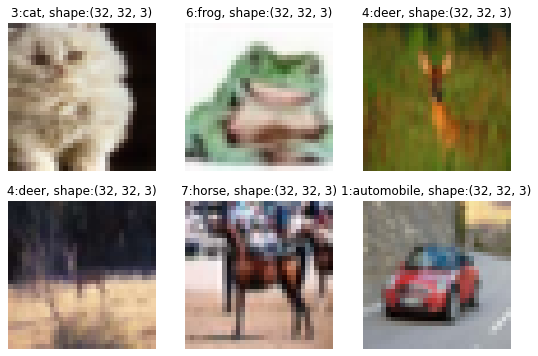

In [11]:
load_data.visualize(row = 2, column = 3, batched_set = train, class_names = class_names)

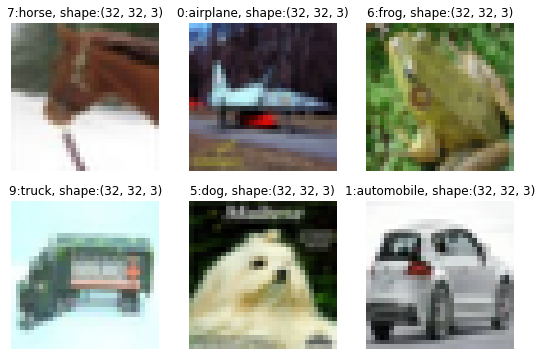

In [12]:
load_data.visualize(row = 2, column = 3, batched_set = test, class_names = class_names)

# Train Template

### Train Variables

In [13]:
# model = Resnet18(100)
learning_rate = 0.001
epochs = 100

### Train Objects

In [14]:
#Loss function
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

train_loss = tf.keras.metrics.Mean(name = "train_loss")
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = "train_accuracy")

test_loss = tf.keras.metrics.Mean(name = "test_loss")
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = "test_accuracy")

In [ ]:
@tf.function
def train_set(image, labels):
  with tf.GradientTape as tape:
    predictions = model(images, training = True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  print(loss)
  train_loss(loss)
  train_accuracy(labels, predictions)



# Train